<h1>Scattering Graph</h1> 

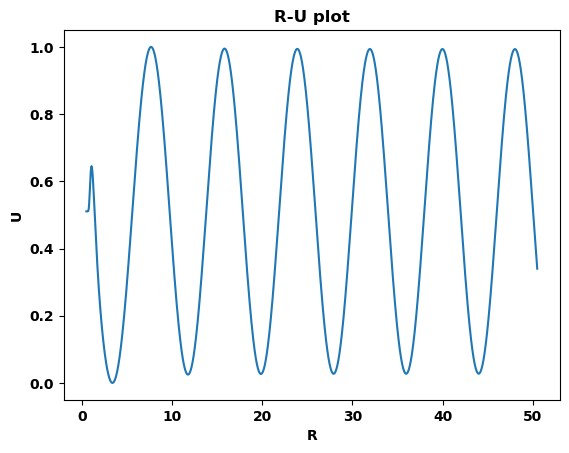

In [60]:
import numpy as np
import math
import matplotlib.pyplot as plt

h=0.01
n=5000
a=6.12
l=1
e=5.9
E=0.1
c=math.sqrt(e*a/25)

r = np.zeros(n)
u = np.zeros(n)
W = np.zeros(n)
r[0]= 0.5
r[1]= 0.51
ra=r[0]**(-5)
rb=r[1]**(-5)
u[0]= math.exp(-c * ra)
u[1]= math.exp(-c * rb)


def v_lj(r):
    return e*((1/r)**12 - 2*(1/r)**6)

def f(r):
    return -a*( E- v_lj(r) - l*(l+1)/(a*r**2))


W[0] = (1- (h**2) * f(r[0])/12)*u[0]
W[1] = (1- (h**2) * f(r[1])/12)*u[1]
 
for i in range(1, n-1):
    r[i+1]= (r[1] + i*h)
    W[i+1]= 2*W[i]- W[i - 1] + h**2 * f(r[i]) * u[i]
    u[i+1]= W[i+1]/(1- (h**2) * f(r[i+1])/12)

u_min = np.min(u)
u_max = np.max(u)
u_normalized = (u - u_min) / (u_max - u_min)


plt.plot(r,u_normalized)
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot')
plt.show()

<h1>No Scattering Graph</h1> 

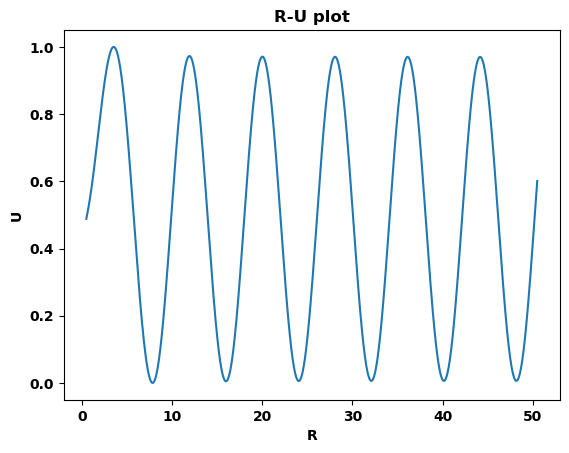

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt

h=0.01
n=5000
a=6.12
l=1
e=5.9
E=0.1
c=math.sqrt(e*a/25)


r = np.zeros(n)
u = np.zeros(n)
W = np.zeros(n)
r[0]= 0.5
r[1]= 0.51
ra=r[0]**(-5)
rb=r[1]**(-5)
u[0]= math.exp(-c * ra)
u[1]= math.exp(-c * rb)


def f(r):
    return -a*( E - l*(l+1)/(a*r**2))


W[0] = (1- (h**2) * f(r[0])/12)*u[0]
W[1] = (1- (h**2) * f(r[1])/12)*u[1]
 
for i in range(1, n-1):
    r[i+1]= (r[1] + i*h)
    W[i+1]= 2*W[i]- W[i - 1] + h**2 * f(r[i]) * u[i]
    u[i+1]= W[i+1]/(1- (h**2) * f(r[i+1])/12)

u_min = np.min(u)
u_max = np.max(u)
u_normalized = (u - u_min) / (u_max - u_min)


plt.plot(r,u_normalized)
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot')
plt.show()

<h1> Combined Graph to visualize Phase Shift </h1> 

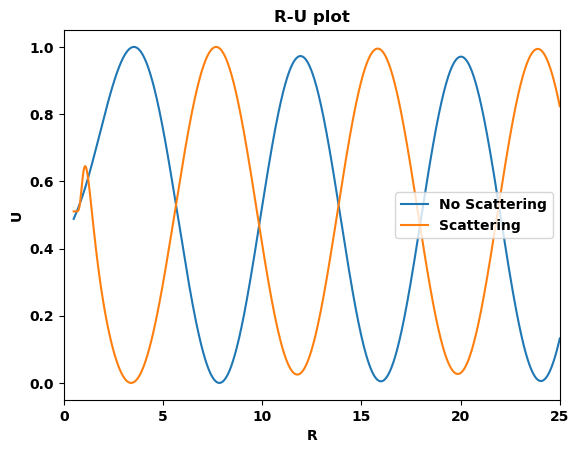

In [63]:
import numpy as np
import math
import matplotlib.pyplot as plt

h = 0.01
n = 5000
a = 6.12
l = 1
e = 5.9
E = 0.1
c = math.sqrt(e * a / 25)

# No Scattering 
r = np.zeros(n)
u = np.zeros(n)
W = np.zeros(n) 
r[0]= 0.5
r[1]= 0.51
ra=r[0]**(-5)
rb=r[1]**(-5)
u[0]= math.exp(-c * ra)
u[1]= math.exp(-c * rb)

def f(r):
    return -a*( E - l*(l+1)/(a*r**2))


W[0] = (1- (h**2) * f(r[0])/12)*u[0]
W[1] = (1- (h**2) * f(r[1])/12)*u[1]
 
for i in range(1, n-1):
    r[i+1]= (r[1] + i*h)
    W[i+1]= 2*W[i]- W[i - 1] + h**2 * f(r[i]) * u[i]
    u[i+1]= W[i+1]/(1- (h**2) * f(r[i+1])/12)
    
u_min = np.min(u)
u_max = np.max(u)
u_normalized = (u - u_min) / (u_max - u_min)

# Scattering 
r2 = np.zeros(n)
u2 = np.zeros(n)
W2 = np.zeros(n)
r2[0] = 0.5
r2[1] = 0.51
ra2 = r2[0]**(-5)
rb2 = r2[1]**(-5)
u2[0] = math.exp(-c * ra2)
u2[1] = math.exp(-c * rb2)

def v_lj(r):
    return e * ((1 / r)**12 - 2 * (1 / r)**6)

def f2(r):
    return -a * (E - v_lj(r) - l * (l + 1) / (a * r**2))

W2[0] = (1 - (h**2) * f2(r2[0]) / 12) * u2[0]
W2[1] = (1 - (h**2) * f2(r2[1]) / 12) * u2[1]

for i in range(1, n - 1):
    r2[i + 1] = r2[1] + i * h
    W2[i + 1] = 2 * W2[i] - W2[i - 1] + h**2 * f2(r2[i]) * u2[i]
    u2[i + 1] = W2[i + 1] / (1 - (h**2) * f2(r2[i + 1]) / 12)
u2_min = np.min(u2)
u2_max = np.max(u2)
u2_normalized = (u2 - u2_min) / (u2_max - u2_min)

plt.plot(r, u_normalized, label='No Scattering')
plt.plot(r2, u2_normalized, label='Scattering')
plt.xlabel('R')
plt.ylabel('U')
plt.title('R-U plot')
plt.xlim(0,25)
plt.legend()
plt.show()
